<a href="https://colab.research.google.com/github/panda667/panda667.github.io/blob/main/SWprj3_2BodyDecay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project #3**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

If we want to save our data to google drive, we have to connect our Python notebook to our google drive account! Running this will ask us to confirm that we want this notebook to be able to access drive. This will also make a folder called 'Python4Physics' in your google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')
'''!mkdir -p "/content/drive/My Drive/Python4Physics"
filepath="drive/My Drive/Python4Physics/"
'''

Mounted at /content/drive


'!mkdir -p "/content/drive/My Drive/Python4Physics"\nfilepath="drive/My Drive/Python4Physics/"\n'

In [8]:
filename = 'pBs_2body_decay.txt'
q0s = np.loadtxt(filename)
print("q0s = ", q0s[0:10])
print("type(q0s) = ", type(q0s))
print("shape(q0s) = ", np.shape(q0s))

q0s =  [0.7338822  0.73414999 0.73213688 0.73275698 0.73319379 0.73484167
 0.73355556 0.73283873 0.73216609 0.73458736]
type(q0s) =  <class 'numpy.ndarray'>
shape(q0s) =  (1000,)


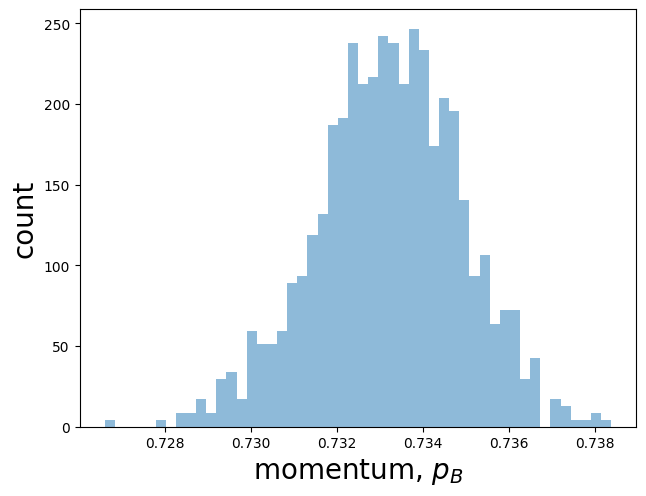

In [9]:
# let us make a figure using the axes class
# first, we create a new figure, we will also learn about multi-line comments created with ''' or """
# Matplotlib user guide: https://matplotlib.org/stable/users/index.html
fig = plt.figure()
''' next, we create a axes canvas.  The 4 numbers represent
    ax = plt.axes([x0, y0, dx, dy])
    - x0: width from left to start canvas (in units of 0 - 1)
    - y0: height from bottome to start canvas
    - dx: width of canvas - NOTE, x0 + dx <= 1
    - dy: height of canvas - NOTE, y0 + dy <= 1
'''
ax    = plt.axes([0.12, 0.12, 0.87, 0.87])
''' Now let us plot the histogram
    - Nbins  : the number of bins to use
    - alpha  : a parameter taking the value [0, 1] that controls opacity
    - ;      : the semi-colon at the end prevents the function from printing
               values of the histogram - try removing it
    - density: it True, normalize so that int(hist) = 1

'''
Nbins = 50
ax.hist(q0s, bins=Nbins, alpha=.5, density=True, label='data');

# let us make some axis labels
ax.set_ylabel(r'count', fontsize=20);
ax.set_xlabel(r'momentum, $p_B$', fontsize=20);

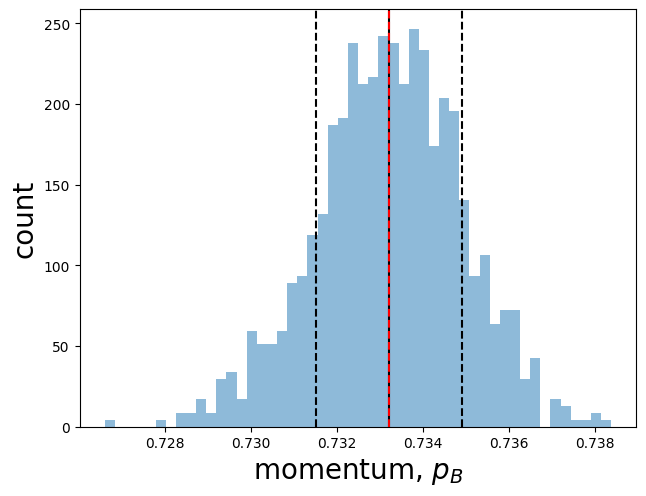

In [10]:
# let us make a figure using the axes class
# first, we create a new figure, we will also learn about multi-line comments created with ''' or """
# Matplotlib user guide: https://matplotlib.org/stable/users/index.html
fig = plt.figure()
''' next, we create a axes canvas.  The 4 numbers represent
    ax = plt.axes([x0, y0, dx, dy])
    - x0: width from left to start canvas (in units of 0 - 1)
    - y0: height from bottome to start canvas
    - dx: width of canvas - NOTE, x0 + dx <= 1
    - dy: height of canvas - NOTE, y0 + dy <= 1
'''
ax    = plt.axes([0.12, 0.12, 0.87, 0.87])
''' Now let us plot the histogram
    - Nbins  : the number of bins to use
    - alpha  : a parameter taking the value [0, 1] that controls opacity
    - ;      : the semi-colon at the end prevents the function from printing
               values of the histogram - try removing it
    - density: it True, normalize so that int(hist) = 1

'''
Nbins = 50
ax.hist(q0s, bins=Nbins, alpha=.5, density=True, label='data');

# let us make some axis labels
ax.set_ylabel(r'count', fontsize=20);
ax.set_xlabel(r'momentum, $p_B$', fontsize=20);

# plot the mean value
ax.axvline(q0s.mean(), color='k')
# plot the standard deviation
ax.axvline(q0s.mean()-q0s.std(), color='k', linestyle='--')
ax.axvline(q0s.mean()+q0s.std(), color='k', linestyle='--')

# median
i_sort = q0s.argsort()
median = q0s[i_sort][len(q0s)//2]
ax.axvline(q0s.mean(), color='r', linestyle='--')

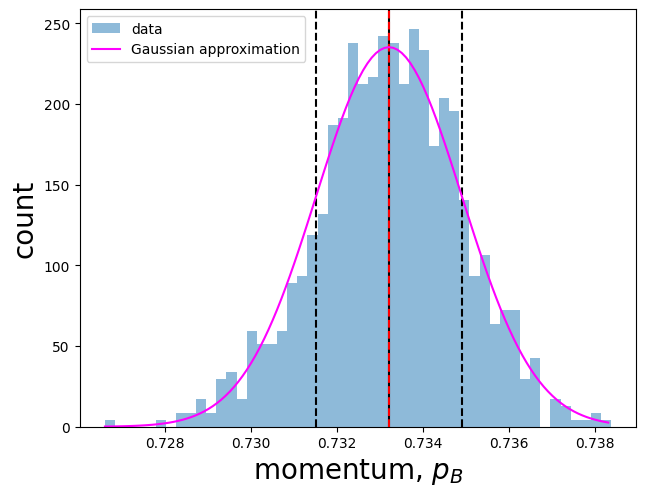

In [11]:
# let us make a figure using the axes class
# first, we create a new figure, we will also learn about multi-line comments created with ''' or """
# Matplotlib user guide: https://matplotlib.org/stable/users/index.html
fig = plt.figure()
''' next, we create a axes canvas.  The 4 numbers represent
    ax = plt.axes([x0, y0, dx, dy])
    - x0: width from left to start canvas (in units of 0 - 1)
    - y0: height from bottome to start canvas
    - dx: width of canvas - NOTE, x0 + dx <= 1
    - dy: height of canvas - NOTE, y0 + dy <= 1
'''
ax    = plt.axes([0.12, 0.12, 0.87, 0.87])
''' Now let us plot the histogram
    - Nbins  : the number of bins to use
    - alpha  : a parameter taking the value [0, 1] that controls opacity
    - ;      : the semi-colon at the end prevents the function from printing
               values of the histogram - try removing it
    - density: it True, normalize so that int(hist) = 1

'''
Nbins = 50
ax.hist(q0s, bins=Nbins, alpha=.5, density=True, label='data');

# let us make some axis labels
ax.set_ylabel(r'count', fontsize=20);
ax.set_xlabel(r'momentum, $p_B$', fontsize=20);

# plot the mean value
ax.axvline(q0s.mean(), color='k')
# plot the standard deviation
ax.axvline(q0s.mean()-q0s.std(), color='k', linestyle='--')
ax.axvline(q0s.mean()+q0s.std(), color='k', linestyle='--')

# median
i_sort = q0s.argsort()
median = q0s[i_sort][len(q0s)//2]
ax.axvline(q0s.mean(), color='r', linestyle='--')

# plot Gaussian [normal] distrubution
''' If the data is "normally distributed", it will have the shape of a Gaussian
    see https://en.wikipedia.org/wiki/Normal_distribution

    prob(x) = Norm * exp( -(x - x_mean) / 2 / sigma**2)

    solve for Norm by

    1 = integral[-inf, inf] dx prob(x)

    Norm = 1 / sqrt(2 * pi * sigma**2)
'''
# create linespace
n_plot = 10000
x_min  = min(q0s)
x_max  = max(q0s)
x_plot = np.arange(x_min, x_max + (x_max-x_min)/n_plot, 1/n_plot)

def mom_dist(x, x_mean, x_sigma):
  Norm = 1 / np.sqrt( (2 * np.pi * x_sigma**2) )
  prob = Norm * np.exp( -(x - x_mean)**2 / 2 / x_sigma**2)

  return prob

gauss = mom_dist(x_plot, q0s.mean(), q0s.std())
ax.plot(x_plot, gauss, color='magenta', label='Gaussian approximation')

# plot our legend
ax.legend(loc=2)

In [12]:
help(ax.hist)

Help on method hist in module matplotlib.axes._axes:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
   